# LIBRARIES

In [219]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from requests.auth import HTTPBasicAuth
from getpass import getpass
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
import datetime
from bs4 import BeautifulSoup
import scipy
from scipy import stats

# --------------------------------------------------------------------------------------------------------------------

# BIKE SHARE DATA

In [2]:
ds1 = pd.read_csv('data/201910-baywheels-tripdata.csv')
ds2 = pd.read_csv('data/201909-baywheels-tripdata.csv')
ds3 = pd.read_csv('data/201908-baywheels-tripdata.csv')
ds4 = pd.read_csv('data/201907-baywheels-tripdata.csv', delimiter = ';')
ds5 = pd.read_csv('data/201906-baywheels-tripdata.csv')
ds6 = pd.read_csv('data/201905-baywheels-tripdata.csv')
ds7 = pd.read_csv('data/201904-fordgobike-tripdata.csv')
ds8 = pd.read_csv('data/201903-fordgobike-tripdata.csv')
ds9 = pd.read_csv('data/201902-fordgobike-tripdata.csv')
ds10 = pd.read_csv('data/201901-fordgobike-tripdata.csv')
ds11 = pd.read_csv('data/201812-fordgobike-tripdata.csv')
ds12 = pd.read_csv('data/201811-fordgobike-tripdata.csv')

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### New Columns

In [3]:
ds_lst = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12]
ds_all = pd.concat(ds_lst, ignore_index = True)
ds = ds_all

ds['date'] = (ds['start_time'].str[:10])
ds['year'] = ds['date'].str[:4]
ds['month'] = ds['date'].str[:7]
ds['day'] = ds['date'].str[8:10]
ds['duration_mins'] = ds['duration_sec'] / 60
ds['sf'] = (ds['start_station_longitude'] < -122.35) & (ds['start_station_longitude'] > -122.52) & (ds['start_station_latitude'] > 37.7) & (ds['start_station_latitude'] < 37.82) & (ds['end_station_longitude'] < -122.35) & (ds['end_station_longitude'] > -122.52) & (ds['end_station_latitude'] > 37.7) & (ds['end_station_latitude'] < 37.82)
ds['trip'] = 1

ds['start_time'] = pd.to_datetime(ds['start_time'])
ds['end_time'] = pd.to_datetime(ds['end_time'])
ds['date'] = pd.to_datetime(ds['date'])

ds['weekday'] = [x.weekday() for x in ds['date']]
ds['weekday'] = np.where((ds['weekday'] == 6) | (ds['weekday'] == 5), 'Weekend', 'Weekday')

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [594]:
ds['time'] = [x.time().strftime('%H:%M:%S') for x in ds['start_time']]
ds['hour'] = ds['time'].str[:2].astype(int)
ds['commute'] = np.where(((ds['time'] > '07:00:00') & (ds['time'] < '10:00:00') & (ds['weekday'] == 'Weekday')) | ((ds['time'] > '16:30:00') & (ds['time'] < '19:30:00') & (ds['weekday'] == 'Weekday')), 'Commute', 'Leisure')
ds.head()

,date,age,gender,start,end,start_station,start_time,end_station,end_time,year,month,day,mins,sf,trip,weekday,commute,time,hour
0,2019-10-31,NaN,NaN,none,none,Horton St at 40th St,2019-10-31 16:25:01.597,Woolsey St at Sacramento St,2019-11-01 09:43:59.029,2019,2019-10,31,1038.950000,False,1,Weekday,Leisure,16:25:01,16
1,2019-10-31,NaN,NaN,Potrero Hill,South Of Market,Illinois St at 20th St,2019-10-31 13:04:11.195,San Francisco Caltrain (Townsend St at 4th St),2019-11-01 09:14:21.805,2019,2019-10,31,1210.166667,True,1,Weekday,Leisure,13:04:11,13
2,2019-10-31,NaN,NaN,South Of Market,South Of Market,Brannan St at 4th St,2019-10-31 17:17:37.648,Brannan St at 4th St,2019-11-01 09:01:33.772,2019,2019-10,31,943.933333,True,1,Weekday,Commute,17:17:37,17
3,2019-10-31,22.0,Male,Downtown,Chinatown,19th Street BART Station,2019-10-31 20:11:11.127,Lake Merritt BART Station,2019-11-01 07:55:21.744,2019,2019-10,31,704.166667,False,1,Weekday,Leisure,20:11:11,20
4,2019-10-31,NaN,NaN,Fruitvale Station,Fruitvale Station,Fruitvale BART Station,2019-10-31 18:48:32.141,Fruitvale BART Station,2019-11-01 05:56:28.467,2019,2019-10,31,667.933333,False,1,Weekday,Commute,18:48:32,18


In [174]:
ds.dtypes

date             datetime64[ns]
age                     float64
gender                   object
start                    object
end                      object
start_station            object
start_time       datetime64[ns]
end_station              object
end_time         datetime64[ns]
year                     object
month                    object
day                      object
mins                    float64
sf                         bool
trip                      int64
weekday                  object
commute                  object
time                     object
hour                      int32
dtype: object

# MAP NEIGHBORHOOD

In [4]:
username = 'dandoye'

def get_neighborhood(geos):
    n = []
    for x in range(len(geos.index)):
        lat = stations['start_station_latitude'][x]
        long = stations['start_station_longitude'][x]
        url =  'http://api.geonames.org/neighbourhood?lat=' + str(lat) + '&lng=' + str(long) + '&username=' + username
        html = requests.get(url).content
        soup = BeautifulSoup(html, "xml")
        if soup.find('status'):
            n.append('none')
        else:
            name = soup.find('name').get_text()
            n.append(name)
    return n

zips = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', delimiter = ';')
sfzips = zips[zips['City'] == 'San Francisco']

stations = ds[['start_station_name','start_station_latitude', 'start_station_longitude']]
stations = stations.drop_duplicates(subset = ['start_station_name'])#, inplace = True)
stations.index = range(len(stations.index))

neighborhoods = get_neighborhood(stations)
len(neighborhoods)

430

In [5]:
# Add Neighborhoods
stations['neighborhood'] = neighborhoods
ds = ds.merge(stations, how = 'left', left_on = 'start_station_name', right_on = 'start_station_name')
ds = ds.merge(stations, how = 'left', left_on = 'end_station_name', right_on = 'start_station_name')
ds = ds[['date', 'member_birth_year', 'member_gender', 'neighborhood_x', 'neighborhood_y', 'start_station_name_x', 'start_time', 'end_station_name', 'end_time', 'year', 'month', 'day', 'duration_mins', 'sf','trip']]
ds.columns = ['date','age','gender','start','end','start_station', 'start_time','end_station','end_time','year','month','day','mins','sf','trip']

# Clean Gender
ds['gender'] = ds['gender'].replace('M', 'Male')
ds['gender'] = ds['gender'].replace('F', 'Female')
ds['gender'] = ds['gender'].replace('O', 'Other')
ds['gender'] = ds['gender'].replace('?', 'Other')

ds['age'] = 2019 - ds['age']
ds.head()

,date,age,gender,start,end,start_station,start_time,end_station,end_time,year,month,day,mins,sf,trip
0,2019-10-31,NaN,NaN,none,none,Horton St at 40th St,2019-10-31 16:25:01.597,Woolsey St at Sacramento St,2019-11-01 09:43:59.029,2019,2019-10,31,1038.950000,False,1
1,2019-10-31,NaN,NaN,Potrero Hill,South Of Market,Illinois St at 20th St,2019-10-31 13:04:11.195,San Francisco Caltrain (Townsend St at 4th St),2019-11-01 09:14:21.805,2019,2019-10,31,1210.166667,True,1
2,2019-10-31,NaN,NaN,South Of Market,South Of Market,Brannan St at 4th St,2019-10-31 17:17:37.648,Brannan St at 4th St,2019-11-01 09:01:33.772,2019,2019-10,31,943.933333,True,1
3,2019-10-31,22.0,Male,Downtown,Chinatown,19th Street BART Station,2019-10-31 20:11:11.127,Lake Merritt BART Station,2019-11-01 07:55:21.744,2019,2019-10,31,704.166667,False,1
4,2019-10-31,NaN,NaN,Fruitvale Station,Fruitvale Station,Fruitvale BART Station,2019-10-31 18:48:32.141,Fruitvale BART Station,2019-11-01 05:56:28.467,2019,2019-10,31,667.933333,False,1


# --------------------------------------------------------------------------------------------------------------------

# TRAFFIC DATA

In [9]:
token = '1f23e31e-e10e-4373-8c67-c1e13363cb20'

response = requests.get('http://api.511.org/traffic/events?api_key=' + token)

In [10]:
response = response.json()
response

JSONDecodeError: Unexpected UTF-8 BOM (decode using utf-8-sig): line 1 column 1 (char 0)

In [ ]:
cid ="53af5d19b4f54767af1e9c59744bbd30" 
secret = "e7c9ab58bf324c5d95e8b8e2ff6c7336"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

http://api.511.org/Traffic/Events

In [1]:
http://api.511.org/traffic/events?api_key=1f23e31e-e10e-4373-8c67-c1e13363cb20

SyntaxError: invalid syntax (<ipython-input-1-cb24d738b841>, line 1)

# --------------------------------------------------------------------------------------------------------------------

# WEATHER DATA

In [6]:
weather = pd.read_csv('data/weather.csv')
weather['date'] = weather[['Year', 'Month', 'Day']].astype(str).apply(lambda x: '-'.join(x), axis=1)
weather.head()

,Day,temp_max,temp_avg,temp_min,dew_max,dew_avg,dew_min,humidity_max,humidity_avg,humidity_min,wind_max,wind_avg,wind_min,pressure_max,pressure_avg,pressure_min,Precipitation,Month,Year,date
0,1,69,58.8,50,49,44.3,39,80,60.6,36,21,9.3,3,30.0,30.0,29.9,0.0,10,2019,2019-10-1
1,2,71,59.4,50,52,44.6,37,80,59.0,36,22,10.3,0,30.1,30.0,30.0,0.0,10,2019,2019-10-2
2,3,66,58.9,53,50,47.3,45,83,66.3,48,25,13.8,3,30.1,30.0,30.0,0.0,10,2019,2019-10-3
3,4,70,60.7,54,49,44.8,39,75,58.0,32,23,11.6,0,30.1,30.1,30.1,0.0,10,2019,2019-10-4
4,5,79,64.3,52,52,42.8,36,69,48.5,21,20,5.6,0,30.1,30.1,30.0,0.0,10,2019,2019-10-5


#### Conversions

In [7]:
import datetime

# Convert Date Format
weather['date'] = pd.to_datetime(weather['date'])
weather['date'][1]

# Convert Metrics
#c = (f-32) / 1.8
#cm = 2.54 * in
weather[['temp_max', 'temp_avg', 'temp_min', 'dew_max', 'dew_avg', 'dew_min']] = weather[['temp_max', 'temp_avg', 'temp_min', 'dew_max', 'dew_avg', 'dew_min']].apply(lambda x : ((x-32) / 1.8))
weather['Precipitation'] = weather['Precipitation'].apply(lambda x : x * 2.54)
weather.head()

,Day,temp_max,temp_avg,temp_min,dew_max,dew_avg,dew_min,humidity_max,humidity_avg,humidity_min,wind_max,wind_avg,wind_min,pressure_max,pressure_avg,pressure_min,Precipitation,Month,Year,date
0,1,20.555556,14.888889,10.000000,9.444444,6.833333,3.888889,80,60.6,36,21,9.3,3,30.0,30.0,29.9,0.0,10,2019,2019-10-01
1,2,21.666667,15.222222,10.000000,11.111111,7.000000,2.777778,80,59.0,36,22,10.3,0,30.1,30.0,30.0,0.0,10,2019,2019-10-02
2,3,18.888889,14.944444,11.666667,10.000000,8.500000,7.222222,83,66.3,48,25,13.8,3,30.1,30.0,30.0,0.0,10,2019,2019-10-03
3,4,21.111111,15.944444,12.222222,9.444444,7.111111,3.888889,75,58.0,32,23,11.6,0,30.1,30.1,30.1,0.0,10,2019,2019-10-04
4,5,26.111111,17.944444,11.111111,11.111111,6.000000,2.222222,69,48.5,21,20,5.6,0,30.1,30.1,30.0,0.0,10,2019,2019-10-05


#### Weather Trends

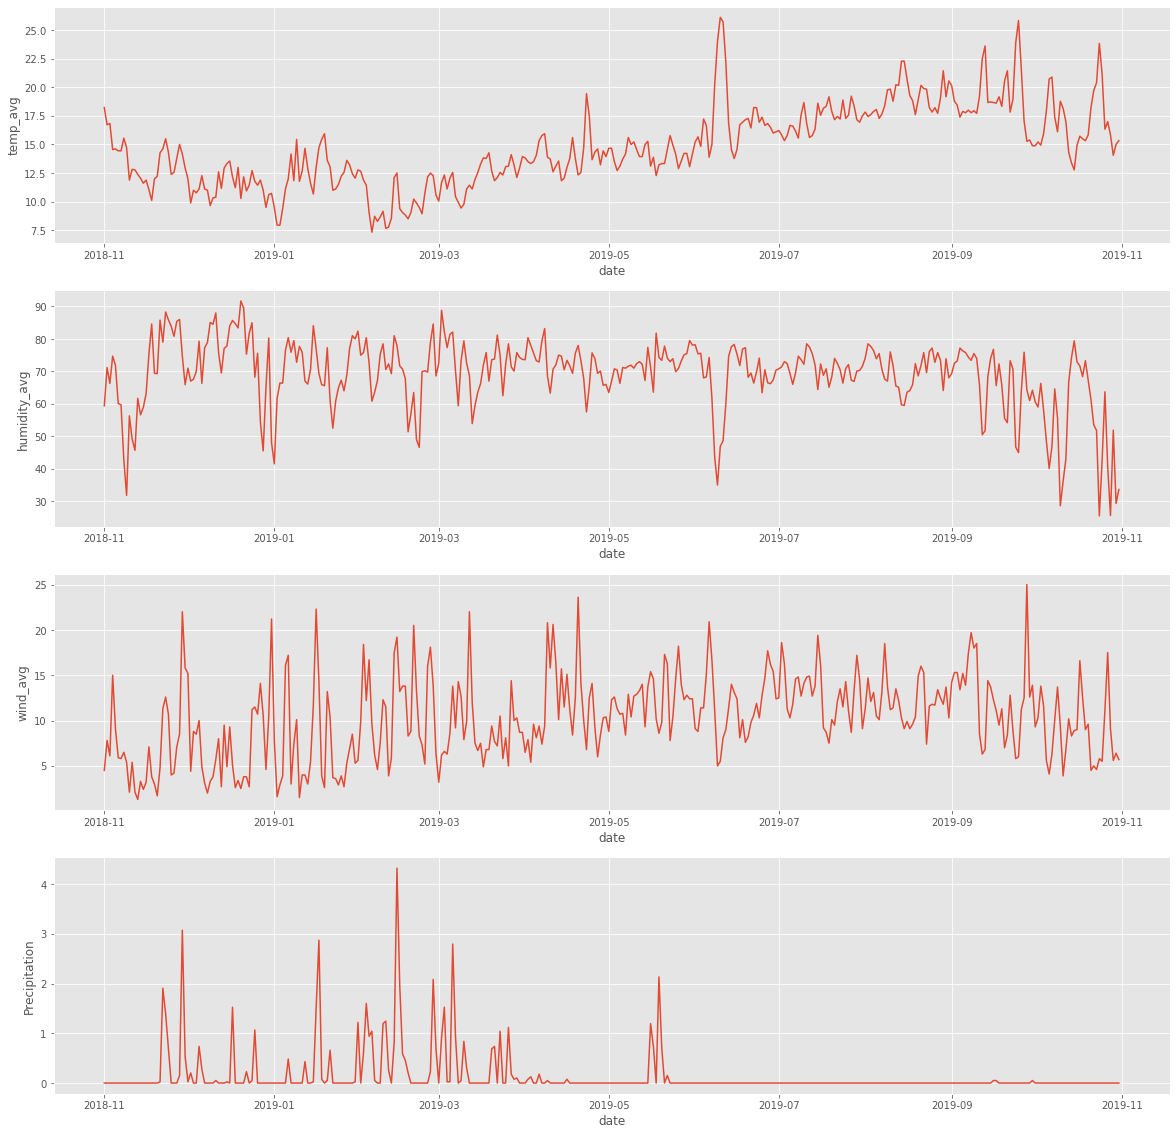

In [118]:
plt.style.use('ggplot')
fig, axs = plt.subplots(4,1, figsize = (20,20))

sns.lineplot(x = 'date', y = 'temp_avg', data = weather, ax = axs[0])
sns.lineplot(x = 'date', y = 'humidity_avg', data = weather, ax = axs[1])
sns.lineplot(x = 'date', y = 'wind_avg', data = weather, ax = axs[2])
sns.lineplot(x = 'date', y = 'Precipitation', data = weather, ax = axs[3])

# --------------------------------------------------------------------------------------------------------------------

# MERGE DATA

In [595]:
weatherrides = ds.merge(weather, on = 'date')
weatherrides = weatherrides.drop(['Day', 'Month', 'Year', 'temp_min', 'dew_max', 'dew_min', 'humidity_max', 'humidity_min', 'wind_max', 'wind_min', 'pressure_max', 'pressure_min'], axis = 1)
sf = weatherrides[weatherrides['sf'] == True]
sf = sf[(sf['gender'] == 'Female') | (sf['gender'] == 'Male')]

# GENDER ANALYSIS

In [461]:
#demographics = gender_age.groupby(['gender','age_group']).count().reset_index()
#demographics['age_group'] = demographics['age_group'].astype('int')
#demographics.head()
#demographics.to_csv('demographics.csv')
#demographics.dtypes

gender_age.head()

,gender,age,age_group
6,Male,34.0,30
8,Male,40.0,35
9,Male,36.0,35
10,Male,33.0,30
11,Female,32.0,30


Male      1202619
Female     361016
Name: gender, dtype: int64
0.7691174730675637
['Male' 'Female']


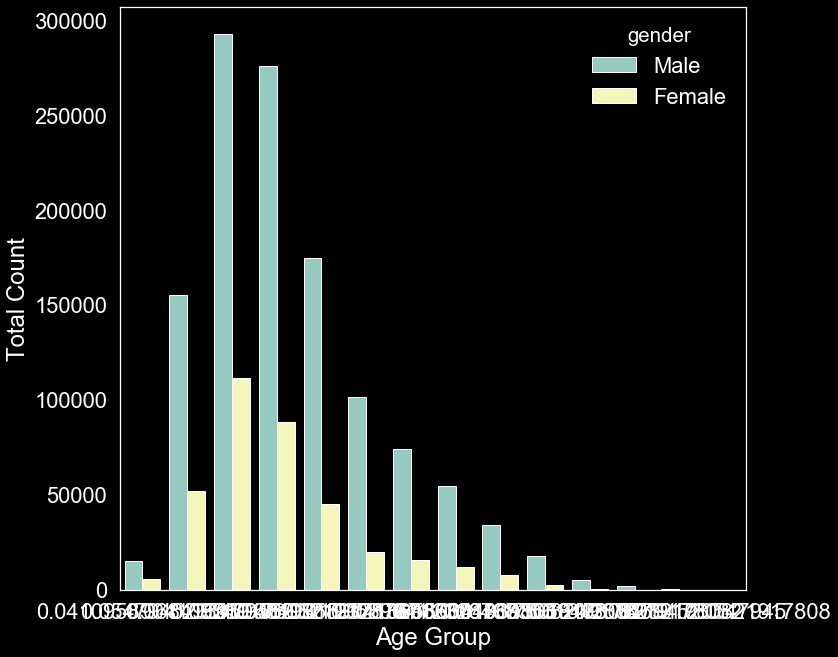

In [774]:
gender_age = sf[['gender', 'age']]
gender_age = gender_age[(gender_age['gender'] != 'Other') & (gender_age['age'] <= 85)]
gender_age['age_group'] = pd.cut(gender_age['age'], [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85], labels = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], precision = -1)


print(gender_age['gender'].value_counts())
print(1202619 / len(gender_age.index))
print(gender_age['gender'].unique())


sns.set(font_scale = 2)
plt.style.use('dark_background')
fig, axs = plt.subplots(1,1, figsize = (10,10))
sns.countplot(x = [x / 365 for x in gender_age['age_group'] / 365], hue = gender_age['gender'])
axs.tick_params(colors='white')
axs.set(xlabel='Age Group', ylabel='Total Count')
axs.xaxis.label.set_color('white')
axs.yaxis.label.set_color('white')
#axs.legend.label.set_color('white')
axs.grid(False)

plt.savefig('graphs/demographics.png', bbox_inches = 'tight', transparent = True)

In [178]:
# Compare Proportions
from scipy.stats import binom_test

male_sf = 0.5098
male_bike = 1202619
total_bike = len(gender_age.index)

binom_test(male_bike, total_bike, male_sf)

4e-323

In [220]:
from statsmodels.stats.proportion import proportions_ztest

value = 0.5098
count = 1202619
nobs = len(gender_age.index)

proportions_ztest(count, nobs, value, alternative = 'larger')

(769.4981853411348, 0.0)

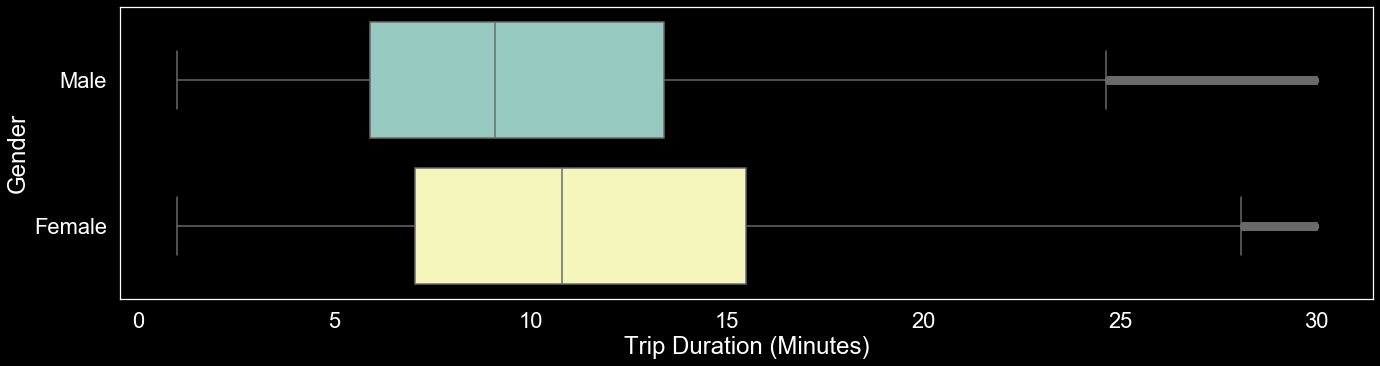

In [591]:
long = sf[(sf['mins'] >= 60) & (sf['gender'] != 'Other')]
mid = sf[(sf['mins'] < 60) & (sf['mins'] >= 30) & (sf['gender'] != 'Other')]
short = sf[(sf['mins'] < 30) & (sf['gender'] != 'Other')]

sns.set(font_scale = 2)
plt.style.use('dark_background')

fig, axs = plt.subplots(1,1, figsize = (20,5))

sns.boxplot(x = short['mins'], y = short['gender'])#, ax = axs[0])
axs.tick_params(colors='white')
axs.set(xlabel='Trip Duration (Minutes)', ylabel='Gender')
axs.xaxis.label.set_color('white')
axs.yaxis.label.set_color('white')
#axs.legend.label.set_color('white')
axs.grid(False)
plt.savefig('graphs/gender-mins.png', bbox_inches = 'tight', transparent = True)

#sns.boxplot(x = mid['mins'], y = mid['gender'], ax = axs[1])
#sns.boxplot(x = long['mins'], y = long['gender'], ax = axs[2])

In [587]:
from scipy.stats import ttest_ind
import random
from random import sample

short_f = short[short['gender'] == 'Female']['mins']
short_m = short[short['gender'] == 'Male']['mins']

short_f_rand = sample(list(short_f), 500)
short_m_rand = sample(list(short_m), 500)

#ttest_ind(short_f, short_m, equal_var = False)
ttest_ind(short_f_rand, short_m_rand, equal_var = False)

Ttest_indResult(statistic=3.511572717270845, pvalue=0.0004654347920368391)

In [589]:
short_f.mean()

10.298686451248992

In [73]:
#rint(long.describe())
#print(mid.describe())
long['mins'].max() 

len(short.index) / len(sf.index)

0.9518428897266572

# WEATHER ANALYSIS

In [145]:
avg_day = sf[['date','gender','trip']]
avg_m = avg_day[avg_day['gender'] == 'Male'].groupby('date').sum()['trip']
avg_f = avg_day[avg_day['gender'] == 'Female'].groupby('date').sum()['trip']

In [529]:
daily = sf[['date', 'gender', 'temp_max', 'Precipitation']].drop_duplicates(subset = ['date','gender'])
daily.index = range(len(daily.index))
daily_m = daily[daily['gender'] == 'Male']
daily_f = daily[daily['gender'] == 'Female']
daily_m = daily_m.merge(avg_m, on = 'date')
daily_f = daily_f.merge(avg_f, on = 'date')
daily = daily_m.merge(daily_f, on = 'date')
daily = daily.drop(['temp_max_y', 'Precipitation_y'], axis = 1)
daily.columns = ['date','male','temp','precip','trips_m', 'female', 'trips_f']
daily['trips_total'] = daily['trips_m'] + daily['trips_f']
daily.head()

,date,male,temp,precip,trips_m,female,trips_f,trips_total
0,2019-10-31,Male,22.222222,0.0,3960,Female,1156,5116
1,2019-10-30,Male,20.000000,0.0,4205,Female,1234,5439
2,2019-10-29,Male,21.111111,0.0,4159,Female,1315,5474
3,2019-10-28,Male,21.666667,0.0,3905,Female,1161,5066
4,2019-10-27,Male,20.555556,0.0,1394,Female,442,1836


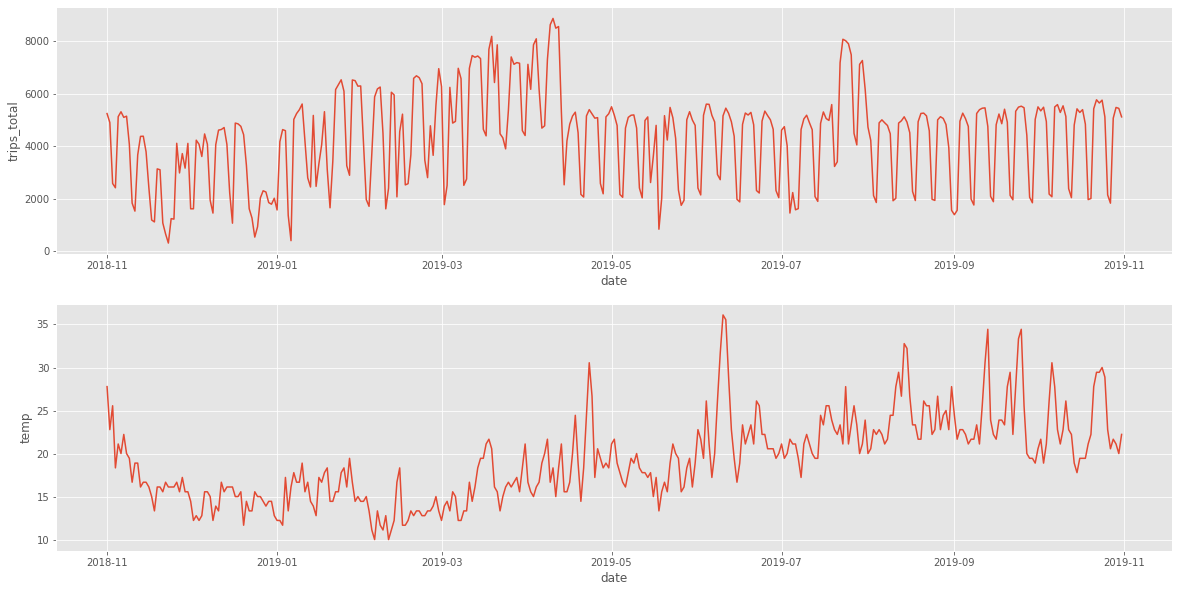

In [257]:
plt.style.use('ggplot')

fig, axs = plt.subplots(2,1, figsize = (20,10))
sns.lineplot(x = 'date', y = 'trips_total', data = daily, ax = axs[0])
sns.lineplot(x = 'date', y = 'temp', data = daily, ax = axs[1])

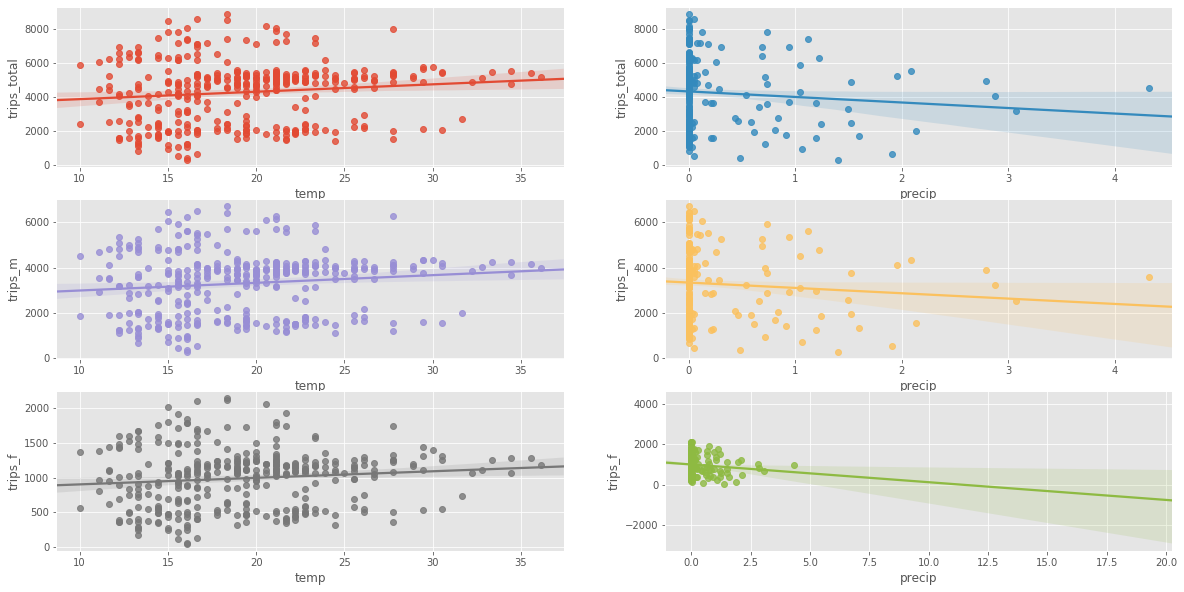

In [153]:
plt.style.use('ggplot')

fig, axs = plt.subplots(3,2, figsize = (20,10))
sns.regplot(x = 'temp', y = 'trips_total', data = daily, ax = axs[0,0])
sns.regplot(x = 'precip', y = 'trips_total', data = daily, ax = axs[0,1])
sns.regplot(x = 'temp', y = 'trips_m', data = daily, ax = axs[1,0])
sns.regplot(x = 'temp', y = 'trips_f', data = daily, ax = axs[2,0])
sns.regplot(x = 'precip', y = 'trips_m', data = daily, ax = axs[1,1])
sns.regplot(x = 'precip', y = 'trips_f', data = daily, ax = axs[2,1])

In [344]:
daily['precip'].corr(daily['trips_total'])

-0.08728938366878825

In [521]:
daily.head()

,date,male,temp,precip,trips_m,female,trips_f,trips_total,trips_m_norm,trips_f_norm
0,2019-10-31,Male,22.222222,0.0,3960,Female,1156,5116,0.589549,0.540187
1,2019-10-30,Male,20.000000,0.0,4205,Female,1234,5439,0.626024,0.576636
2,2019-10-29,Male,21.111111,0.0,4159,Female,1315,5474,0.619175,0.614486
3,2019-10-28,Male,21.666667,0.0,3905,Female,1161,5066,0.581361,0.542523
4,2019-10-27,Male,20.555556,0.0,1394,Female,442,1836,0.207533,0.206542


In [531]:
daily['trips_m_norm'] = daily['trips_m'] / daily['trips_m'].max()
daily['trips_f_norm'] = daily['trips_f'] / daily['trips_f'].max()

daily['weekday'] = [x.weekday() for x in daily['date']]
daily['weekday'] = np.where((daily['weekday'] == 6) | (daily['weekday'] == 5), 'Weekend', 'Weekday')

daily_week = daily[daily['weekday'] == 'Weekday']
daily_end = daily[daily['weekday'] == 'Weekend']
daily_week['trips_norm'] = daily_week['trips_total'] / daily_week['trips_total'].max()
daily_end['trips_norm'] = daily_end['trips_total'] / daily_end['trips_total'].max()

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Ttest_indResult(statistic=6.952837991762461, pvalue=6.6616990833805e-11)

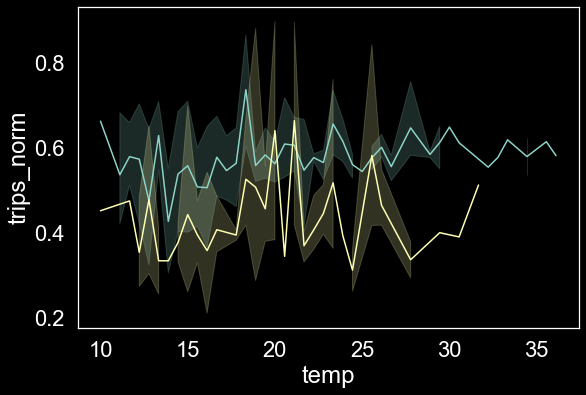

In [535]:


sns.lineplot(x = 'temp', y = 'trips_norm', data = daily_week)
sns.lineplot(x = 'temp', y = 'trips_norm', data = daily_end)
plt.grid(False)

ttest_ind(daily_week['trips_norm'], daily_end['trips_norm'], equal_var = False)

Ttest_indResult(statistic=1.9233658490488248, pvalue=0.05482517597357314)

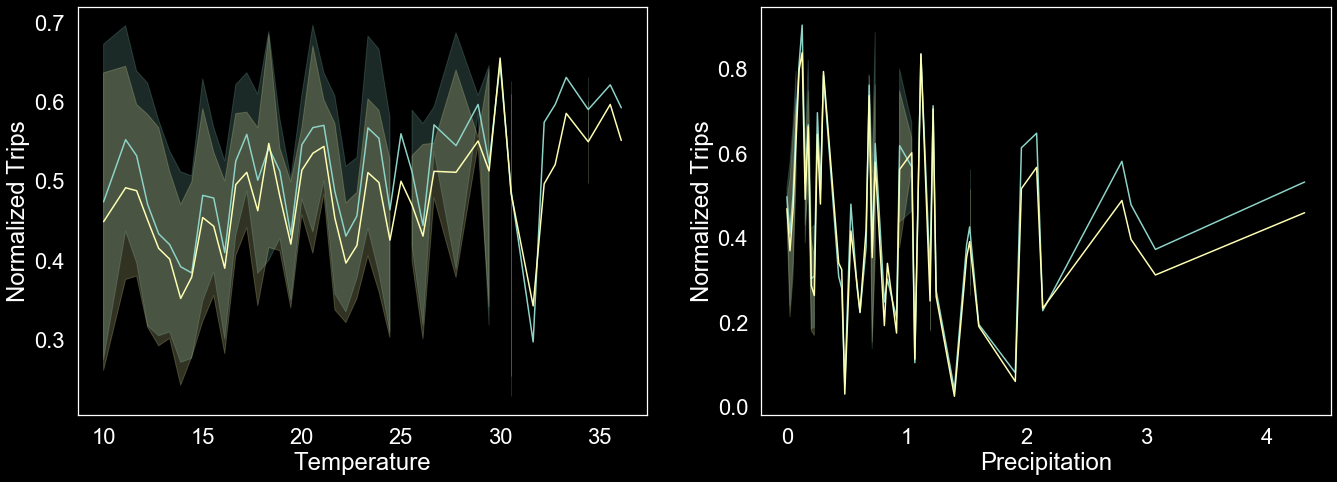

In [738]:
sns.set(font_scale = 2)
plt.style.use('dark_background')

fig, axs = plt.subplots(1,2, figsize = (20,7))

sns.lineplot(x = 'temp', y = 'trips_m_norm', data = daily, ax = axs[0])
sns.lineplot(x = 'temp', y = 'trips_f_norm', data = daily, ax = axs[0])
axs[0].set(xlabel='Temperature', ylabel='Normalized Trips')
sns.lineplot(x = 'precip', y = 'trips_m_norm', data = daily, ax = axs[1])
sns.lineplot(x = 'precip', y = 'trips_f_norm', data = daily, ax = axs[1])
axs[1].set(xlabel='Precipitation', ylabel='Normalized Trips')
axs[0].grid(False)
axs[1].grid(False)
plt.savefig('graphs/temp.png', bbox_inches = 'tight', transparent = True)
ttest_ind(daily['trips_m_norm'], daily['trips_f_norm'], equal_var = False)

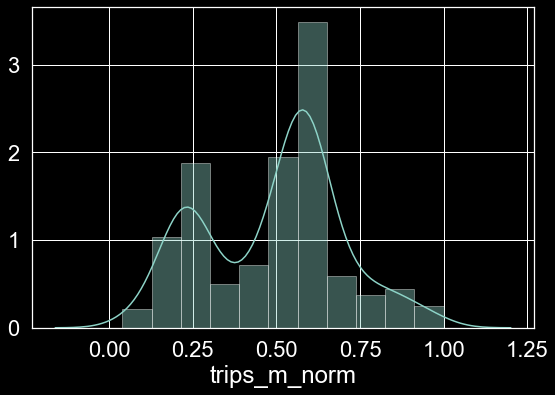

In [736]:
sns.distplot(daily['trips_m_norm'])#, ax = axs[0])

# LOCATION ANALYSIS

In [709]:
markets = ['South Of Market', 'Mission', 'Financial District', 'Western Addition', 'Downtown', 'Castro-Upper Market', 'Potrero Hill', 'Noe Valley', 'Haight-Ashbury', 'North Beach']

geos_map2 = geos_map[(geos_map['start'].isin(markets)) & (geos_map['end'].isin(markets))]
geos_map2['trip'] = round(geos_map2['trip'] / 365, 0)
geos_map2.head()

C:\Users\dandoye\Anaconda3\envs\ironhack\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,start,end,trip
45,Castro-Upper Market,Castro-Upper Market,20.0
47,Castro-Upper Market,Downtown,17.0
49,Castro-Upper Market,Financial District,19.0
51,Castro-Upper Market,Haight-Ashbury,4.0
54,Castro-Upper Market,Mission,45.0


In [727]:
print(sum(geos_map['trip']) / 365)
geos_map2.groupby('start').sum().sort_values(by = 'trip', ascending = False)
(1348 + 812 +453 + 534 + 220 + 173 + 158) / 4287

4287.660273972603


0.8626078843013762

In [ ]:
plt.style.use('ggplot')
geos = sf[['start', 'end', 'gender','trip']]
geos_map = geos.groupby(['start','end']).sum()['trip'].reset_index()

fig, axs = plt.subplots(2,1, figsize = (20,10))
sns.countplot(y = 'start', data = geos, order = geos['start'].value_counts().index, ax = axs[0])
sns.countplot(y = 'end', data = geos, order = geos['start'].value_counts().index, ax = axs[1])

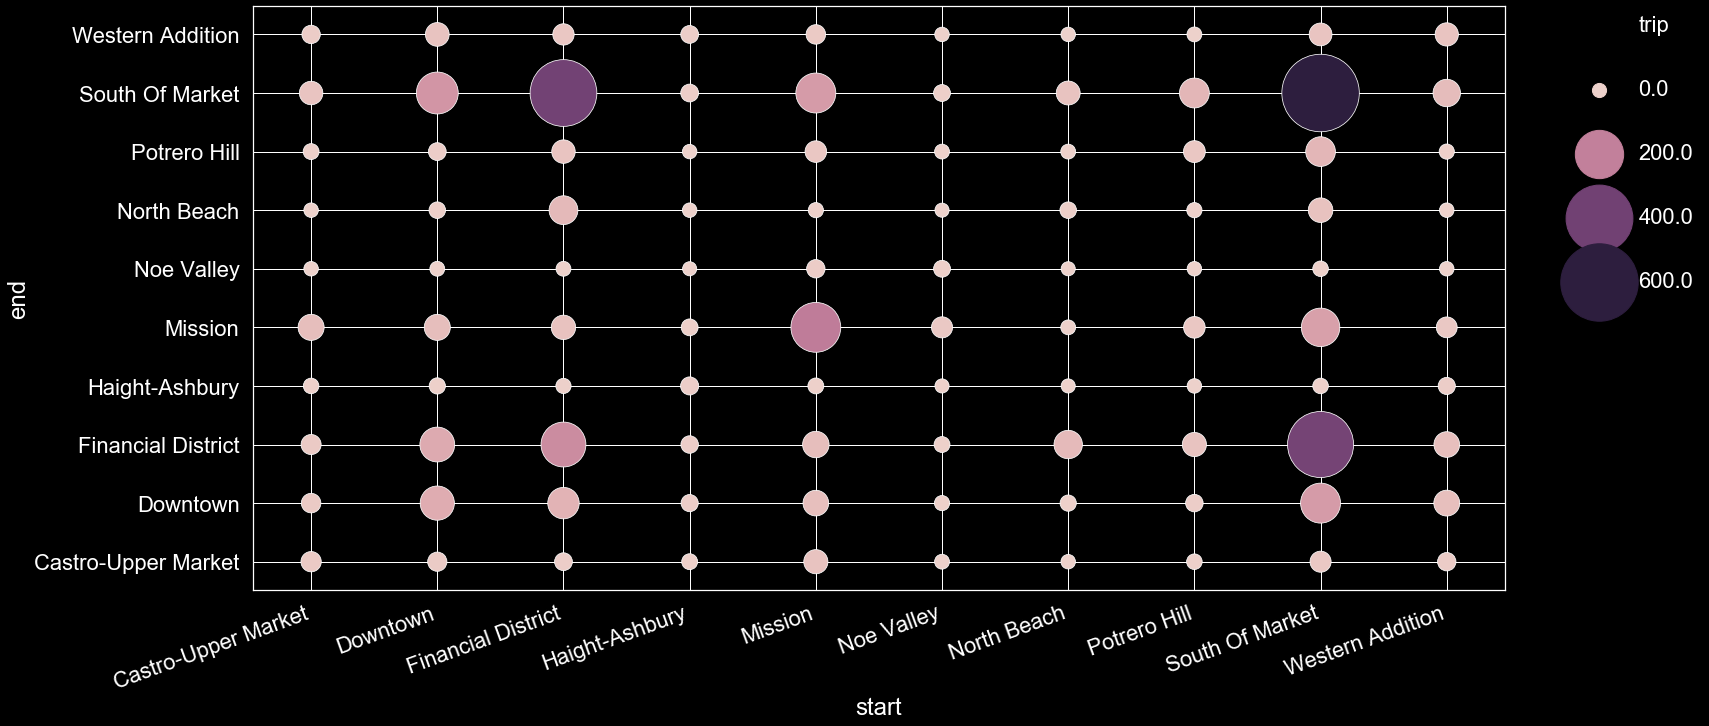

In [708]:
sns.set(font_scale = 2)
plt.style.use('dark_background')
fig, axs = plt.subplots(1,1, figsize = (20,10))
sns.scatterplot(x = 'start', y = 'end', data = geos_map2, hue = 'trip', size = 'trip', sizes = (200,6000))
plt.xticks(rotation=20, horizontalalignment='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labelspacing = 2)
plt.savefig('graphs/start-end.png', bbox_inches = 'tight', transparent = True)
#axs.grid(False)

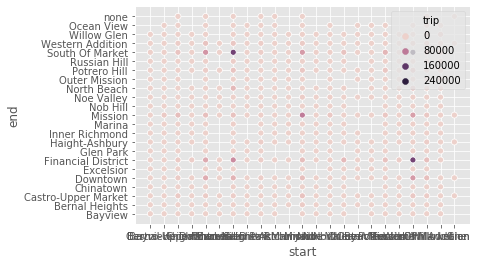

In [275]:
#from scipy.stats import chi2_contingency
#chi2_contingency()


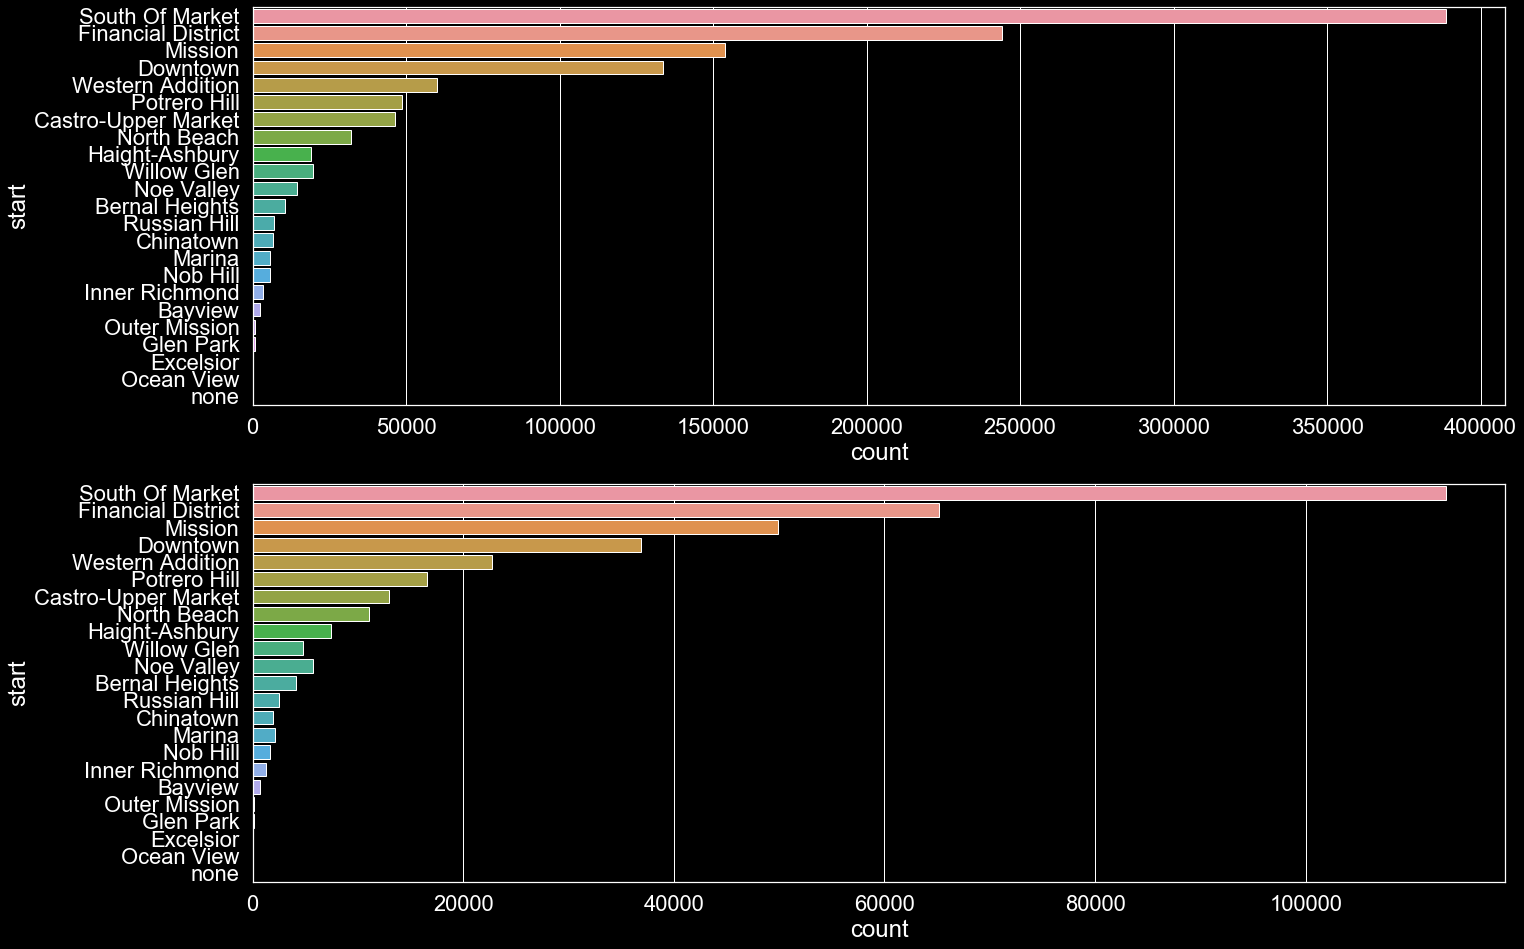

In [775]:
from scipy.stats import chi2_contingency

geos = geos[(geos['gender'] == 'Male') | (geos['gender'] == 'Female')]
start = pd.pivot_table(geos, values = 'trip', columns = 'gender', index = ['start'], aggfunc = np.sum)
geos_m = geos[geos['gender'] == 'Male']
geos_f = geos[geos['gender'] == 'Female']

fig, axs = plt.subplots(2,1, figsize = (20,15))
sns.countplot(y = 'start', data = geos_m, order = geos['start'].value_counts().index, ax = axs[0])
sns.countplot(y = 'start', data = geos_f, order = geos['start'].value_counts().index, ax = axs[1])

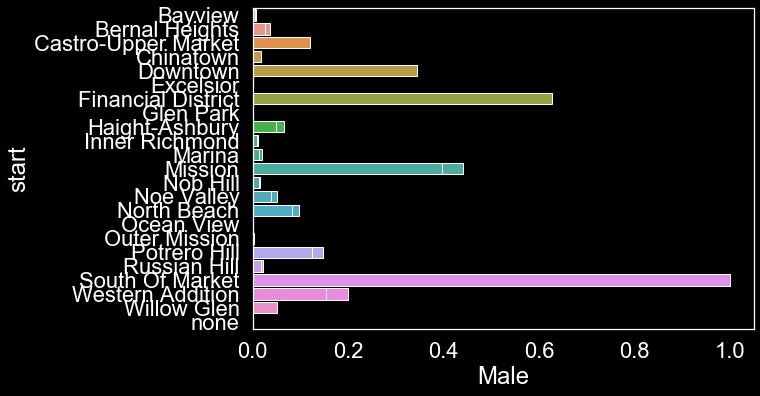

In [793]:
start = pd.pivot_table(geos, values = 'trip', columns = 'gender', index = ['start'], aggfunc = np.sum)
start.reset_index()
start['Female'] = start['Female'] / start['Female'].max()
start['Male'] = start['Male'] / start['Male'].max()


sns.barplot(x = start['Female'], y = start.index)
sns.barplot(x = start['Male'], y = start.index)
plt.grid(False)

In [630]:
ttest_rel(start['Female'], start['Male'])#, equal_var = False)

Ttest_relResult(statistic=0.9790978666554118, pvalue=0.3381764854371365)

In [253]:
f = start['Female'].to_numpy()
m = start['Male'].to_numpy()

chisquare(f, m)

Power_divergenceResult(statistic=0.014177948326782422, pvalue=1.0)

In [364]:
np.finfo('float')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

# WEEKEND vs. WEEKDAY

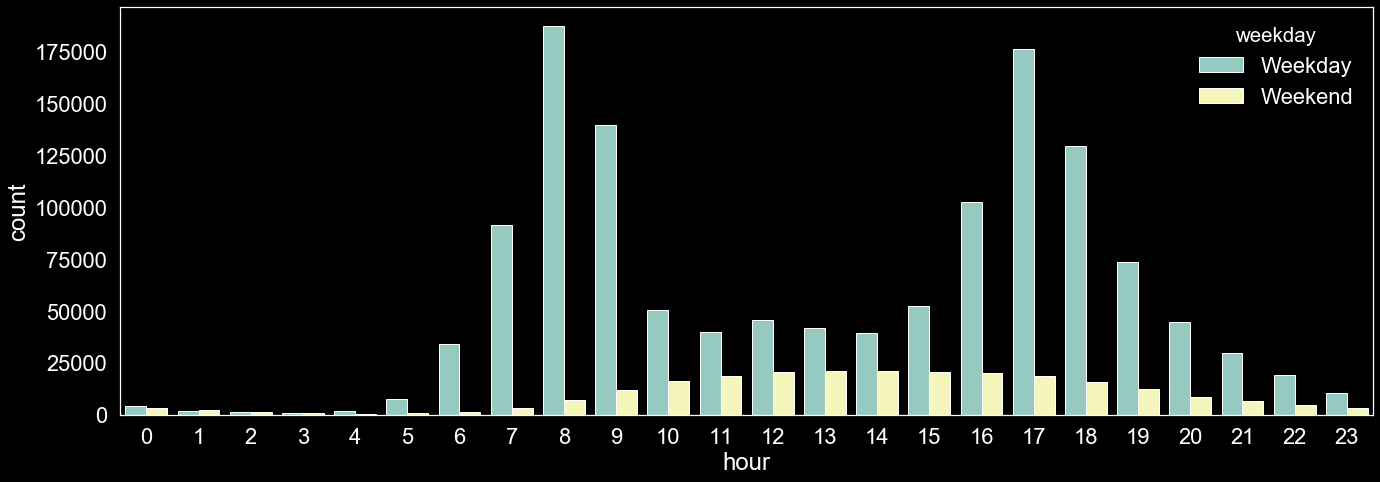

In [599]:
why = sf[['date','gender','start','end','trip','weekday','commute','hour']]
why_f = why[why['gender'] == 'Female']
why_m = why[why['gender'] == 'Male']

fig, axs = plt.subplots(1,1, figsize = (20,7))
sns.countplot(x = 'hour', hue = 'weekday', data = why)#, ax = axs[0])
axs.grid(False)
plt.savefig('graphs/commuters.png', bbox_inches = 'tight', transparent = True)
#sns.countplot(x = 'hour', hue = 'weekday', data = why[why['commute'] == 'Leisure'], ax = axs[1])
#sns.countplot(x = 'hour', hue = 'commute', data = why, ax = axs[1])
#sns.countplot(x = 'hour', hue = 'weekday', data = why_m, ax = axs[1])
#sns.countplot(why['weekday'])

In [481]:
fun_week.head()

,date,gender,start,end,trip,weekday,commute,hour
1,2019-10-31,NaN,Potrero Hill,South Of Market,1,Weekday,Leisure,13
5,2019-10-31,NaN,Mission,Downtown,1,Weekday,Leisure,23
6,2019-10-31,Male,South Of Market,Castro-Upper Market,1,Weekday,Leisure,20
8,2019-10-31,Male,Downtown,Mission,1,Weekday,Leisure,23
9,2019-10-31,Male,Downtown,Financial District,1,Weekday,Leisure,23


In [ ]:
why_work = why[why['weekday'] == 'Weekday']
why_play = why[why['weekday'] == 'Weekend']
fun_week = why[(why['commute'] == 'Leisure') & (why['weekday'] == 'Weekday')]
fun_end = why[(why['commute'] == 'Leisure') & (why['weekday'] == 'Weekend')]

fig, axs = plt.subplots(1,1, figsize = (20,15))
sns.countplot(y = 'start', data = why, order = why['start'].value_counts().index, hue = 'weekday')

,date,gender,start,end,trip,weekday,commute,hour
1,2019-10-31,NaN,Potrero Hill,South Of Market,1,Weekday,Leisure,13
5,2019-10-31,NaN,Mission,Downtown,1,Weekday,Leisure,23
6,2019-10-31,Male,South Of Market,Castro-Upper Market,1,Weekday,Leisure,20
8,2019-10-31,Male,Downtown,Mission,1,Weekday,Leisure,23
9,2019-10-31,Male,Downtown,Financial District,1,Weekday,Leisure,23
10,2019-10-31,Male,Mission,Western Addition,1,Weekday,Leisure,23
11,2019-10-31,Female,Castro-Upper Market,Castro-Upper Market,1,Weekday,Leisure,23
12,2019-10-31,NaN,Mission,South Of Market,1,Weekday,Leisure,23
13,2019-10-31,Male,Downtown,South Of Market,1,Weekday,Leisure,23
14,2019-10-31,Male,South Of Market,Potrero Hill,1,Weekday,Leisure,23


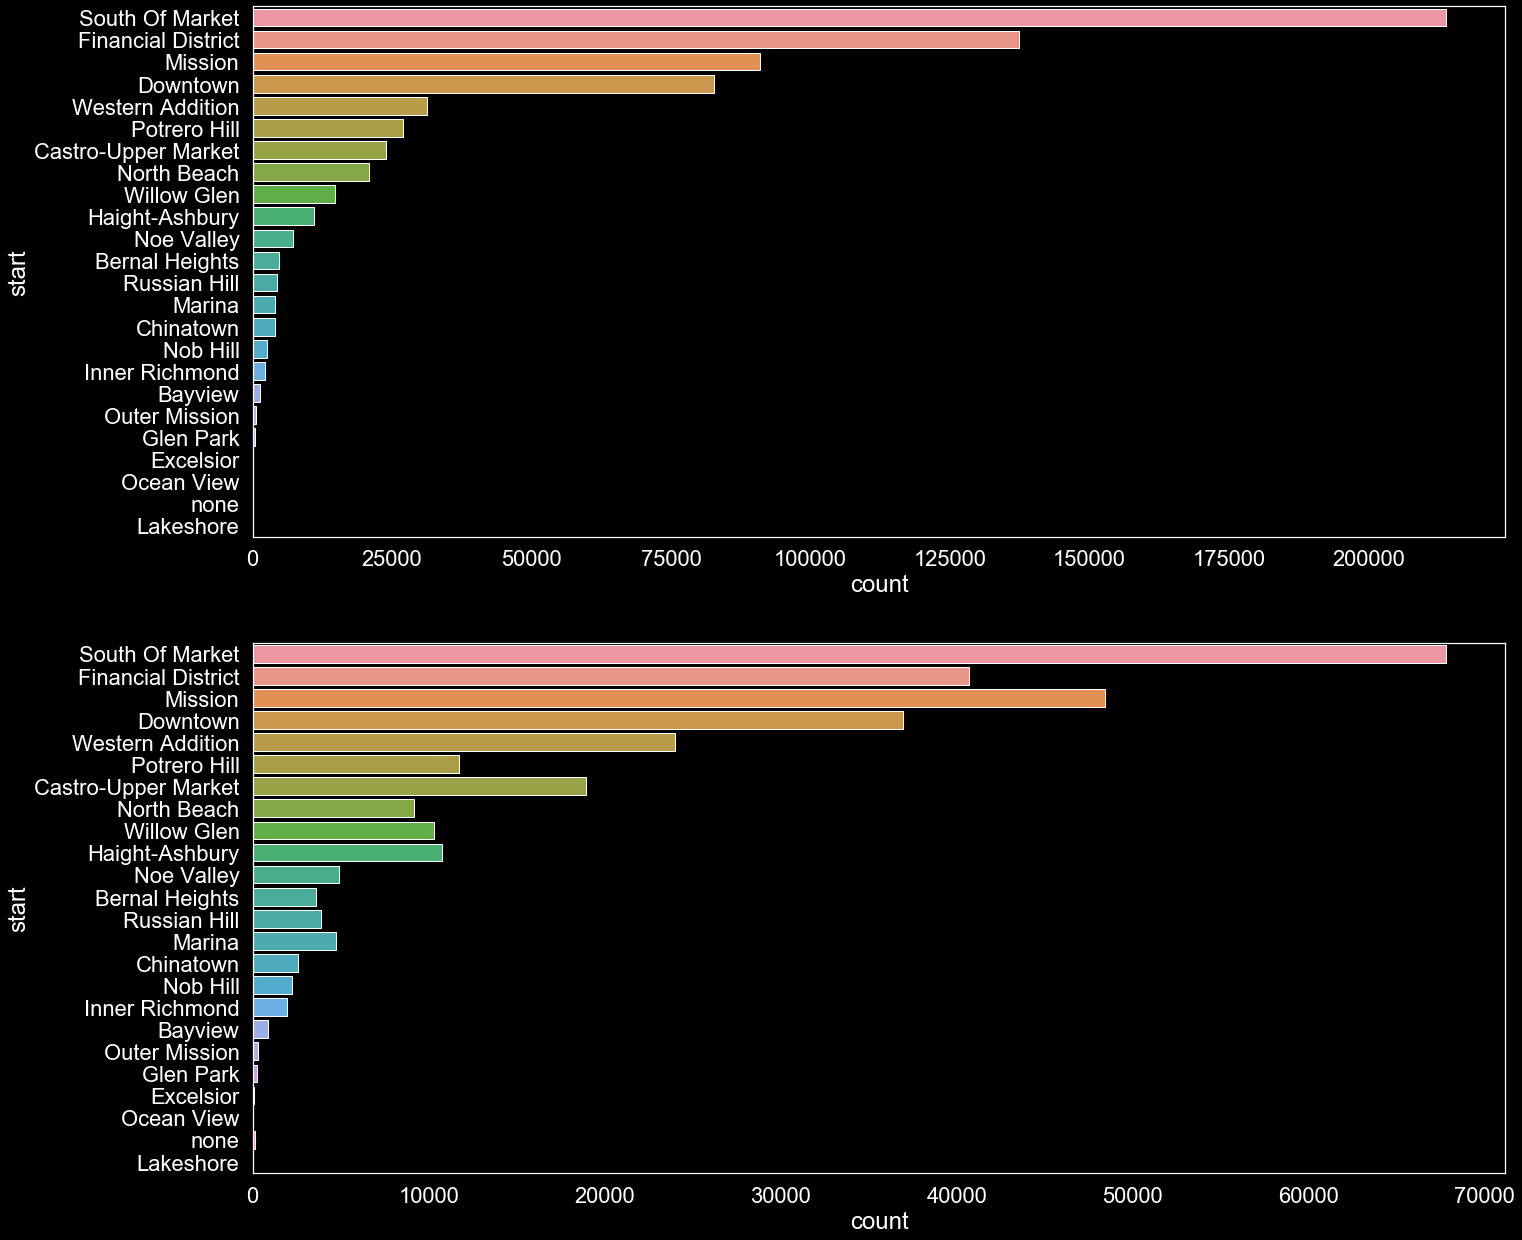

In [602]:
fig, axs = plt.subplots(2,1, figsize = (20,20))
sns.countplot(y = 'start', data = fun_week, order = fun_week['start'].value_counts().index, ax = axs[0])
sns.countplot(y = 'start', data = fun_end, order = fun_week['start'].value_counts().index, ax = axs[1])
axs[0].grid(False)
axs[1].grid(False)
plt.savefig('graphs/hoodbyday.png', bbox_inches = 'tight', transparent = True)

In [603]:
fun_week2 = fun_week.drop([['date','gender','end','weekday',''])

,date,gender,start,end,trip,weekday,commute,hour
1,2019-10-31,NaN,Potrero Hill,South Of Market,1,Weekday,Leisure,13
5,2019-10-31,NaN,Mission,Downtown,1,Weekday,Leisure,23
6,2019-10-31,Male,South Of Market,Castro-Upper Market,1,Weekday,Leisure,20
8,2019-10-31,Male,Downtown,Mission,1,Weekday,Leisure,23
9,2019-10-31,Male,Downtown,Financial District,1,Weekday,Leisure,23


Ttest_indResult(statistic=-0.777098048355167, pvalue=0.44130485338462333)

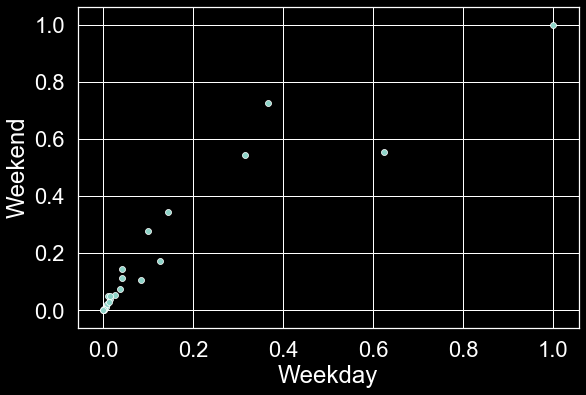

In [631]:
why_all = pd.pivot_table(why, values = 'trip', columns = 'weekday', index = ['start'], aggfunc = np.sum)
why_all = why_all.fillna(0)
why_all.reset_index()
why_all['Weekday'] = why_all['Weekday'] / why_all['Weekday'].max()
why_all['Weekend'] = why_all['Weekend'] / why_all['Weekend'].max()
sns.scatterplot(x = why_all['Weekday'], y = why_all['Weekend'])

ttest_ind(why_all['Weekday'].values, why_all['Weekend'].values, equal_var = False)
#chisquare(why_all['Weekday'].values, why_all['Weekend'].values)

In [506]:
why_all.head()
#ttest_ind(why_all['Weekday'].values, why_all['Weekend'].values, equal_var = False)
ttest_rel(why_all['Weekday'].values, why_all['Weekend'].values)

#why_all

Ttest_relResult(statistic=-3.3181184407366504, pvalue=0.0029965382750908555)

In [424]:
why2 = sf[['start','trip','weekday','commute','hour']]
why_work = why2[why2['weekday'] == 'Weekday']
why_play = why2[why2['weekday'] == 'Weekend']
why_work = why_work.groupby(['start','commute','hour']).sum().reset_index()
why_play = why_play.groupby(['start','commute','hour']).sum().reset_index()
why2 = why_work.merge(why_play, on = ['start', 'commute', 'hour'])
why_play = why2[why2['commute'] == 'Leisure'].drop('commute', axis = 1)

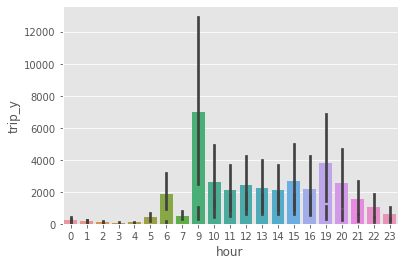

In [426]:
sns.barplot(x = 'hour', y = 'trip_x', data = why_play)
sns.barplot(x = 'hour', y = 'trip_y', data = why_play)

In [403]:
daily = sf[['date', 'gender', 'temp_max', 'Precipitation']].drop_duplicates(subset = ['date','gender'])
daily.index = range(len(daily.index))
daily_m = daily[daily['gender'] == 'Male']
daily_f = daily[daily['gender'] == 'Female']
daily_m = daily_m.merge(avg_m, on = 'date')
daily_f = daily_f.merge(avg_f, on = 'date')
daily = daily_m.merge(daily_f, on = 'date')
daily = daily.drop(['temp_max_y', 'Precipitation_y'], axis = 1)
daily.columns = ['date','male','temp','precip','trips_m', 'female', 'trips_f']
daily['trips_total'] = daily['trips_m'] + daily['trips_f']
daily.head()

,date,gender,start,end,trip,weekday,commute,hour
1,2019-10-31,NaN,Potrero Hill,South Of Market,1,Weekday,Leisure,13
2,2019-10-31,NaN,South Of Market,South Of Market,1,Weekday,Commute,17
5,2019-10-31,NaN,Mission,Downtown,1,Weekday,Leisure,23
6,2019-10-31,Male,South Of Market,Castro-Upper Market,1,Weekday,Leisure,20
8,2019-10-31,Male,Downtown,Mission,1,Weekday,Leisure,23


# INVENTORY

In [840]:
st = 'San Francisco Caltrain (Townsend St at 4th St)'

len(sf[(sf['gender'] == 'Female') & (sf['start_station'] == st)]) / len(sf[sf['start_station'] == st])

0.21235981865903125

In [834]:
q = stock_out.merge(stock_in, left_on = 'start_station', right_on = 'end_station').drop('end_station', axis=1)
q['delta'] = q['out'] + q['in']
q.sort_values('delta')



,start_station,out,in,delta
133,McAllister St at Baker St,-6403,2742,-3661
52,Broderick St at Oak St,-6494,3120,-3374
54,Bryant St at 2nd St,-12931,9750,-3181
59,Central Ave at Fell St,-8086,5271,-2815
110,Hyde St at Post St,-6446,3737,-2709
23,24th St at Chattanooga St,-4812,2205,-2607
122,Koshland Park,-4587,2185,-2402
72,Duboce Park,-4830,2603,-2227
120,Jones St at Post St,-6725,4588,-2137
125,Leavenworth St at Broadway,-3238,1196,-2042


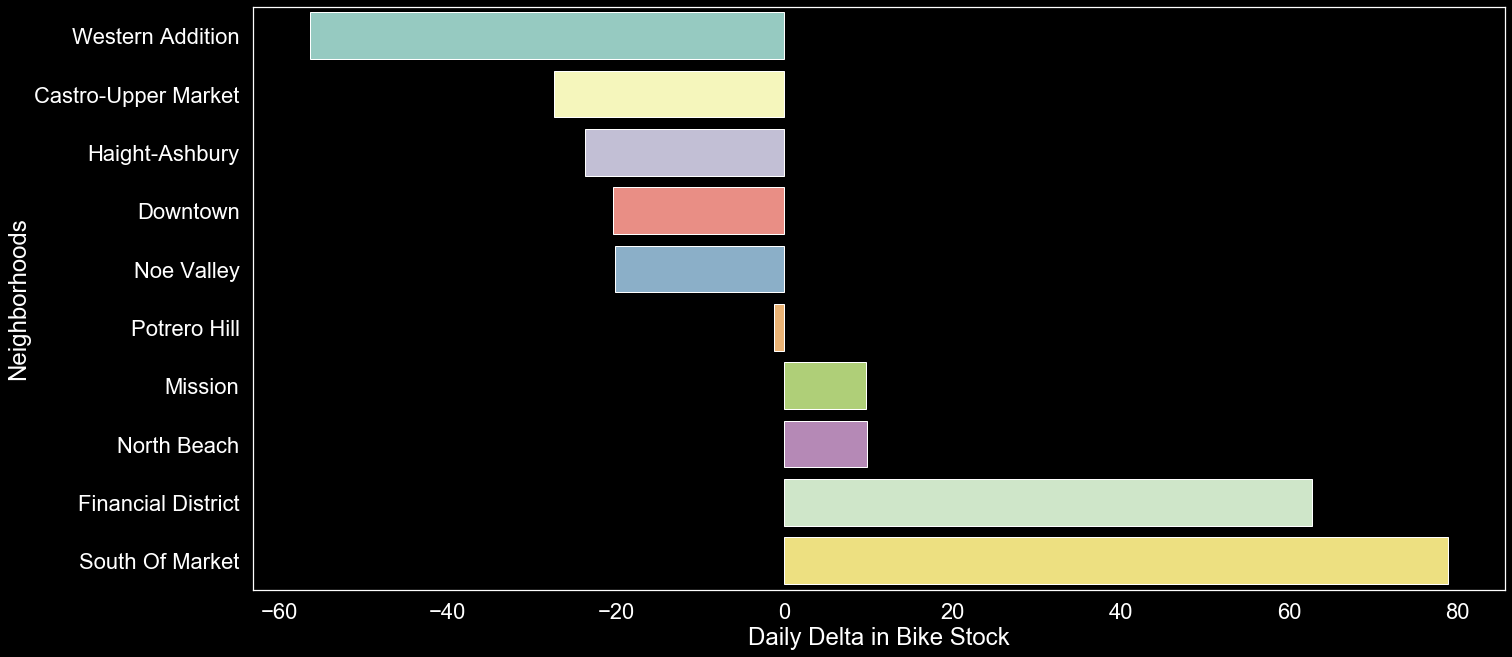

In [841]:
# Switch to daily inventory

stock_in = pd.DataFrame(sf['end_station'])
stock_out = pd.DataFrame(sf['start_station'])
stock_in['in'] = 1
stock_out['out'] = -1
stock_in = stock_in.groupby('end_station').sum().reset_index()
stock_out = stock_out.groupby('start_station').sum().reset_index()
stock = stock_in.merge(stock_out, how = 'left', left_on = 'end_station', right_on = 'start_station').drop('start_station', axis = 1)[1:]
stock['delta'] = stock['in'] + stock['out']

stock = stock.merge(stations, how = 'left', left_on = 'end_station', right_on = 'start_station_name').drop(['start_station_name', 'start_station_longitude', 'start_station_latitude'], axis=1)
stock = (stock.groupby('neighborhood').sum() / 365).reset_index()
stock = stock.sort_values('delta')
stock = stock[stock['neighborhood'].isin(markets)]
#stock.head()

sns.set(font_scale = 2)
plt.style.use('dark_background')

fig, axs = plt.subplots(1,1, figsize = (20,10))
sns.barplot(y = 'neighborhood', x = 'delta', data = stock)
axs.set(xlabel='Daily Delta in Bike Stock', ylabel='Neighborhoods')
axs.grid(False)

plt.savefig('graphs/inventory.png', bbox_inches = 'tight', transparent = True)

In [573]:
len(sf[sf['gender'] == 'Female'].index) / len(sf.index)

0.2308344558069158

In [621]:
for x in stock['neighborhood']:
    n = x
    if len(sf[sf['start'] == n].index) != 0:
        f = len(sf[(sf['start'] == n) & (sf['gender'] == 'Female')].index) / len(sf[sf['start'] == n].index)
        print(n + ":" + str(f))


Western Addition:0.27449042321090633
Castro-Upper Market:0.21767321230085218
Haight-Ashbury:0.2789961564548949
Downtown:0.2159488492847222
Noe Valley:0.281496062992126
Nob Hill:0.2305678059536935
Inner Richmond:0.27365615282096845
Bernal Heights:0.28172189955585925
Chinatown:0.22557437920631238
Potrero Hill:0.25446715910135775
Glen Park:0.19080459770114944
Outer Mission:0.17677824267782427
Excelsior:0.2613065326633166
Ocean View:0.19444444444444445
none:0.38235294117647056
Bayview:0.2397465821940647
Russian Hill:0.2695503942041338
Marina:0.27786458333333336
Mission:0.24481956790486842
North Beach:0.2568273045778324
Financial District:0.2107402210252
South Of Market:0.22573633279074262


In [625]:
fp = [0.274490423, 0.217673212, 0.278996156, 0.215948849, 0.281496063, 0.230567806, 0.273656153, 0.2817219, 0.225574379, 0.254467159, 0.190804598, 0.176778243, 0.261306533, 0.194444444, 0.382352941, 0.239746582, 0.269550394, 0.277864583, 0.244819568, 0.256827305, 0.210740221, 0.225736333]
fp_names = ['Western Addition', 'Castro-Upper Market', 'Haight-Ashbury', 'Downtown', 'Noe Valley', 'Nob Hill', 'Inner Richmond', 'Bernal Heights', 'Chinatown', 'Potrero Hill', 'Glen Park', 'Outer Mission', 'Excelsior', 'Ocean View', 'none', 'Bayview', 'Russian Hill', 'Marina', 'Mission', 'North Beach', 'Financial District', 'South Of Market']
fp2 = pd.DataFrame(fp, fp_names)
fp2.columns = ['p_female']
fp2.sort_values('p_female', ascending = False)


,p_female
none,0.382353
Bernal Heights,0.281722
Noe Valley,0.281496
Haight-Ashbury,0.278996
Marina,0.277865
Western Addition,0.274490
Inner Richmond,0.273656
Russian Hill,0.269550
Excelsior,0.261307
North Beach,0.256827


In [574]:
for x in stock['neighborhood']:
    n = x
    if len(sf[sf['start'] == n].index) != 0:
        value = len(sf[sf['gender'] == 'Female'].index) / len(sf.index)
        count = len(sf[(sf['start'] == n) & (sf['gender'] == 'Female')].index)
        nobs = len(sf[sf['start'] == n].index)
        pv = proportions_ztest(count, nobs, value, alternative = 'larger')[1]
        print(n + ":" + str(pv))

Western Addition:5.588891459405415e-175
Castro-Upper Market:0.9999999999999961
Haight-Ashbury:8.078785098445716e-69
Noe Valley:2.5145337177236638e-58
Downtown:1.0
Nob Hill:0.5215032986248386
Inner Richmond:5.797035124431074e-11
Bernal Heights:6.2252797986381304e-43
Chinatown:0.8786604723310236
Glen Park:0.9986714334438402
Outer Mission:0.9999941009924249
Excelsior:0.1639355428717308
none:0.034529253376000296
Ocean View:0.7823618198539382
Bayview:0.12648217859686878
Potrero Hill:5.522698184077124e-44
Russian Hill:1.4185925855068796e-17
Marina:1.7746329607843058e-20
Mission:4.036704831595828e-49
North Beach:2.3886313112562127e-35
Financial District:1.0
South Of Market:1.0


# NEIGHBORHOOD STATIONS

In [814]:
hood_stops = sf[['start','start_station']].drop_duplicates()
hood_stops = hood_stops.groupby('start').count().reset_index()
hood_stops = hood_stops.sort_values('start_station', ascending = False)

hood_trips = sf[['start', 'trip']].groupby('start').sum().reset_index()

hood_stats = hood_stops.merge(hood_trips, on = 'start')
hood_stats['trip'] = hood_stats['trip'] / 365
hood_stats['trips_per'] = round(hood_stats['trip'] / hood_stats['start_station'], 0)
hood_stats.sort_values('trips_per', ascending = False)

hood_stats = hood_stats.merge(fp2, left_on = 'start', right_on = fp2.index, how = 'left')


hood_stats = hood_stats.merge(stock, left_on = 'start', right_on = 'neighborhood', how = 'inner')
hood_stats['trip'].corr(hood_stats['delta'])
hood_lots = hood_stats[hood_stats['trip'] > 55]
hood_lots['trip'].sum() / hood_stats['trip'].sum()

hood_lots['trips_per'].corr(hood_lots['p_female'])
#hood_lots['start'].values

-0.6980709184419017

In [858]:
hood_stats['start_station'].sum()
print(21/208)
hood_stats['p1'] = hood_stats['start_station'] / hood_stats['start_station'].sum()
hood_stats['p2'] = hood_stats['trip'] / hood_stats['trip'].sum()
ttest_rel(hood_stats['p1'], hood_stats['p2'])

hood_stats

0.10096153846153846


,start,start_station,trip,trips_per,p_female,neighborhood,in,out,delta,p1,p2
0,South Of Market,47,1375.104110,29.0,0.225736,South Of Market,1427.257534,-1348.295890,78.961644,0.225962,0.325826
1,Mission,30,558.476712,19.0,0.244820,Mission,568.252055,-558.476712,9.775342,0.144231,0.132329
2,Financial District,21,847.358904,40.0,0.210740,Financial District,910.076712,-847.358904,62.717808,0.100962,0.200779
3,Western Addition,18,227.290411,13.0,0.274490,Western Addition,170.879452,-227.290411,-56.410959,0.086538,0.053856
4,Downtown,16,467.487671,29.0,0.215949,Downtown,447.183562,-467.487671,-20.304110,0.076923,0.110770
5,Bayview,14,8.216438,1.0,0.239747,Bayview,8.350685,-8.216438,0.134247,0.067308,0.001947
6,Castro-Upper Market,11,162.679452,15.0,0.217673,Castro-Upper Market,135.298630,-162.679452,-27.380822,0.052885,0.038546
7,Potrero Hill,9,178.778082,20.0,0.254467,Potrero Hill,177.616438,-178.778082,-1.161644,0.043269,0.042361
8,Inner Richmond,8,12.334247,2.0,0.273656,Inner Richmond,7.452055,-12.334247,-4.882192,0.038462,0.002923
9,Noe Valley,6,55.671233,9.0,0.281496,Noe Valley,35.550685,-55.671233,-20.120548,0.028846,0.013191


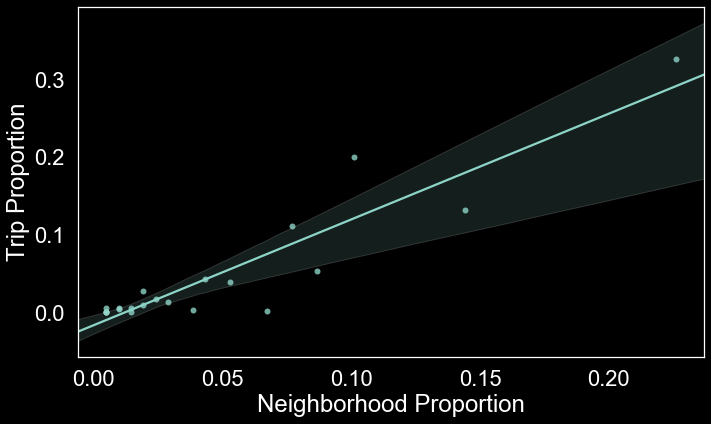

In [861]:
fig, axs = plt.subplots(1,1, figsize = (10,6))
sns.regplot(x = 'p1', y = 'p2', data = hood_stats)
axs.set(xlabel='Neighborhood Proportion', ylabel='Trip Proportion')
axs.grid(False)

plt.savefig('graphs/neighborhood-trips.png', bbox_inches = 'tight', transparent = True)

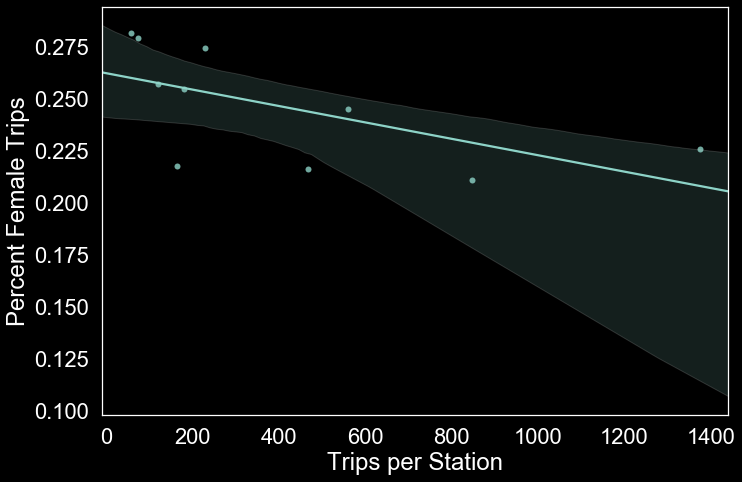

In [816]:
sns.set(font_scale = 2)
plt.style.use('dark_background')

fig, axs = plt.subplots(1,1, figsize = (10,7))
sns.regplot(x = 'trip', y = 'p_female', data = hood_stats[hood_stats['trip'] > 55])
axs.set(xlabel='Trips per Station', ylabel='Percent Female Trips')
axs.grid(False)
#plt.savefig('graphs/p-female-trips.png', bbox_inches = 'tight', transparent = True)

In [803]:
hood_stats['p_station'] = hood_stats['start_station'] / hood_stats['start_station'].max()
hood_stats['p_trip'] = hood_stats['trip'] / hood_stats['trip'].max()

print(hood_stats['trip'].sum())
print(501913 / 1540433)

hood_stats

ttest_rel(hood_stats['p_station'], hood_stats['p_trip'])

4220.364383561644
0.32582592037433633


Ttest_relResult(statistic=2.9811606463387585, pvalue=0.007121700444035445)

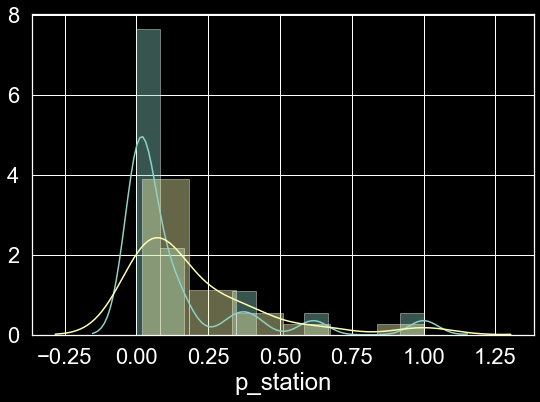

In [812]:
sns.distplot(hood_stats['p_trip'])
sns.distplot(hood_stats['p_station'])

# OTHER

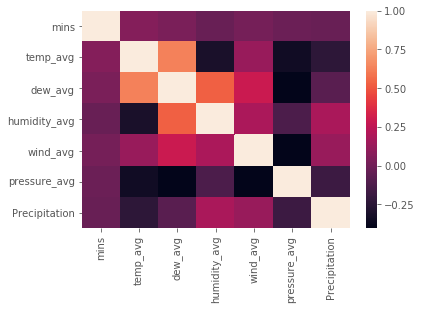

In [74]:
time_temp = short[['mins', 'temp_avg', 'dew_avg', 'humidity_avg', 'wind_avg', 'pressure_avg', 'Precipitation']]
corr = time_temp.corr()
sns.heatmap(corr)

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (20,10))
volume_day = ds['date'].value_counts()
volume_month = ds.groupby('month').sum()
sns.lineplot(x = volume_day.index, y = volume_day.values, ax = axs[0])
sns.lineplot(x = volume_month.index, y = volume_month.values, ax = axs[1])

fig, axs = plt.subplots(1,4, figsize = (20,5))

sns.lineplot(x = volume.index, y = volume.values, data = volume, ax = axs[0])
#sns.lineplot(x = 'date', y = 'humidity_avg', data = ds, ax = axs[1])
#sns.lineplot(x = 'date', y = 'wind_avg', data = ds, ax = axs[2])
#sns.lineplot(x = 'date', y = 'Precipitation', data = ds, ax = axs[3])